<a href="https://colab.research.google.com/github/sajla97k/RNN-Python/blob/main/stock_price_predictn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing,
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [ ]:
data = pd.read_csv("/content/drive/MyDrive/RNN/Apple.csv")


In [ ]:
data.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.8475,27.860001,26.837500,27.3325,24.745996,212818400
1,2015-01-05,27.0725,27.162500,26.352501,26.5625,24.048864,257142000


In [ ]:
data.info()

In [ ]:
length_data = len(data)     # rows that data has
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio)
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 1761
Train data length : 1233
Validation data lenth : 528


In [ ]:
train_data = data[:length_train].iloc[:,:2]
train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object
train_data

,Date,Open
0,2015-01-02,27.847500
1,2015-01-05,27.072500
2,2015-01-06,26.635000
3,2015-01-07,26.799999
4,2015-01-08,27.307501
...,...,...
1228,2019-11-18,66.449997
1229,2019-11-19,66.974998
1230,2019-11-20,66.385002
1231,2019-11-21,65.922501


In [ ]:
validation_data = data[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object
validation_data

,Date,Open
1233,2019-11-25,65.677498
1234,2019-11-26,66.735001
1235,2019-11-27,66.394997
1236,2019-11-29,66.650002
1237,2019-12-02,66.817497
...,...,...
1756,2021-12-22,173.039993
1757,2021-12-23,175.850006
1758,2021-12-27,177.089996
1759,2021-12-28,180.160004


In [ ]:
dataset_train = train_data.Open.values
dataset_train.shape

(1233,)

In [ ]:
# Change 1d array to 2d array
# Changing shape from (1692,) to (1692,1)
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(1233, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(1233, 1)

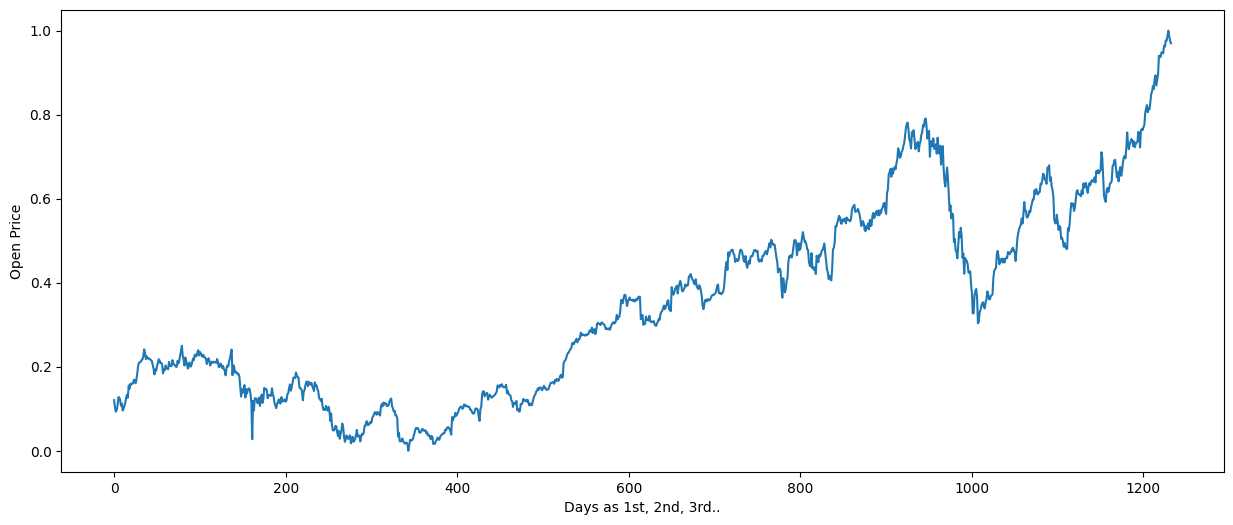

In [ ]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()


In [ ]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])

# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (1183, 50)
Shape of y_train before reshape : (1183,)


In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (1183, 50, 1)
Shape of y_train after reshape : (1183, 1)


In [ ]:
X_train[0]

array([[0.12023609],
       [0.10281057],
       [0.09297358],
       [0.09668351],
       [0.10809446],
       [0.12743115],
       [0.12703767],
       [0.12046094],
       [0.10702642],
       [0.11242271],
       [0.09572794],
       [0.10028104],
       [0.1065205 ],
       [0.11388423],
       [0.12535135],
       [0.13344574],
       [0.12602586],
       [0.15531196],
       [0.14794829],
       [0.15964025],
       [0.15767288],
       [0.16020237],
       [0.16020237],
       [0.16874647],
       [0.16874647],
       [0.16048345],
       [0.16958966],
       [0.1842046 ],
       [0.20269813],
       [0.20955594],
       [0.21073636],
       [0.21152331],
       [0.21630128],
       [0.21708824],
       [0.22495787],
       [0.24137159],
       [0.23361438],
       [0.21804381],
       [0.22484543],
       [0.22062958],
       [0.21899949],
       [0.21978645],
       [0.21686342],
       [0.21585157],
       [0.21337831],
       [0.20466557],
       [0.19533447],
       [0.181

In [ ]:
y_train[0]

array([0.20179877])

In [ ]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True,
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam",
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)


Epoch 1/50
37/37 [==============================] - 7s 55ms/step - loss: 0.4735 - accuracy: 8.4531e-04
Epoch 2/50
37/37 [==============================] - 2s 59ms/step - loss: 0.2702 - accuracy: 0.0017
Epoch 3/50
37/37 [==============================] - 2s 52ms/step - loss: 0.2012 - accuracy: 0.0017
Epoch 4/50
37/37 [==============================] - 1s 38ms/step - loss: 0.1787 - accuracy: 8.4531e-04
Epoch 5/50
37/37 [==============================] - 1s 35ms/step - loss: 0.1267 - accuracy: 8.4531e-04
Epoch 6/50
37/37 [==============================] - 1s 35ms/step - loss: 0.0957 - accuracy: 0.0017
Epoch 7/50
37/37 [==============================] - 1s 35ms/step - loss: 0.0826 - accuracy: 8.4531e-04
Epoch 8/50
37/37 [==============================] - 1s 38ms/step - loss: 0.0683 - accuracy: 0.0017
Epoch 9/50
37/37 [==============================] - 1s 38ms/step - loss: 0.0569 - accuracy: 0.0017
Epoch 10/50
37/37 [==============================] - 1s 37ms/step - loss: 0.0451 - accuracy: 

In [ ]:
# Losses
history.history["loss"]

[0.47345978021621704,
 0.2701728045940399,
 0.2011648267507553,
 0.1786678433418274,
 0.12670515477657318,
 0.09565258026123047,
 0.08255211263895035,
 0.0682905986905098,
 0.056934889405965805,
 0.04508259519934654,
 0.04191988706588745,
 0.039226923137903214,
 0.03063434362411499,
 0.02661251462996006,
 0.026686128228902817,
 0.023577988147735596,
 0.019609570503234863,
 0.01859039068222046,
 0.017049144953489304,
 0.017207171767950058,
 0.014385201036930084,
 0.013117283582687378,
 0.01254247035831213,
 0.011228745803236961,
 0.011348041705787182,
 0.009562083519995213,
 0.010198811069130898,
 0.009044177830219269,
 0.008695906959474087,
 0.00795187707990408,
 0.007363012991845608,
 0.006523963995277882,
 0.007006972562521696,
 0.006212067790329456,
 0.005910929758101702,
 0.0055119674652814865,
 0.005403959657996893,
 0.004847043659538031,
 0.0053444597870111465,
 0.00499240355566144,
 0.005660620983690023,
 0.004397783428430557,
 0.003988516051322222,
 0.004251514561474323,
 0.003

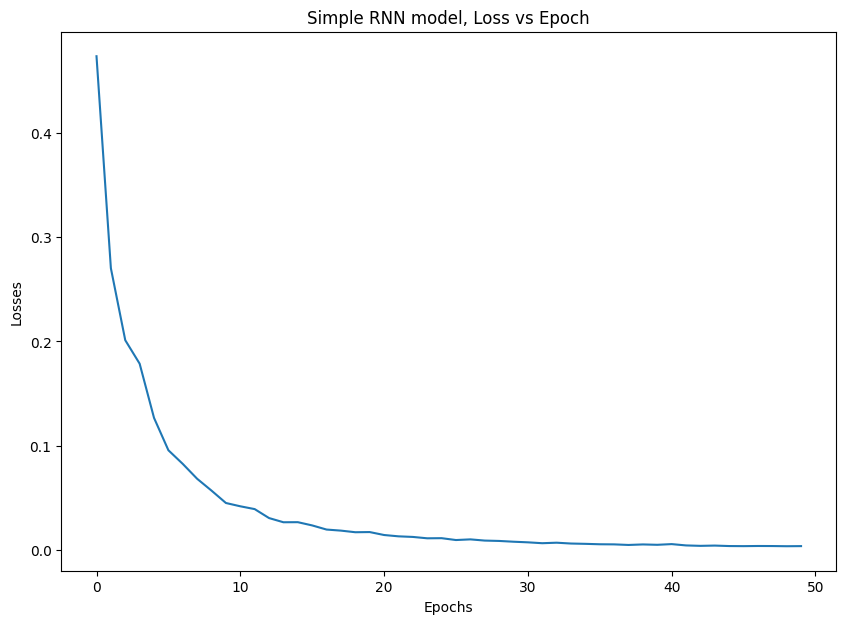

In [ ]:
#Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

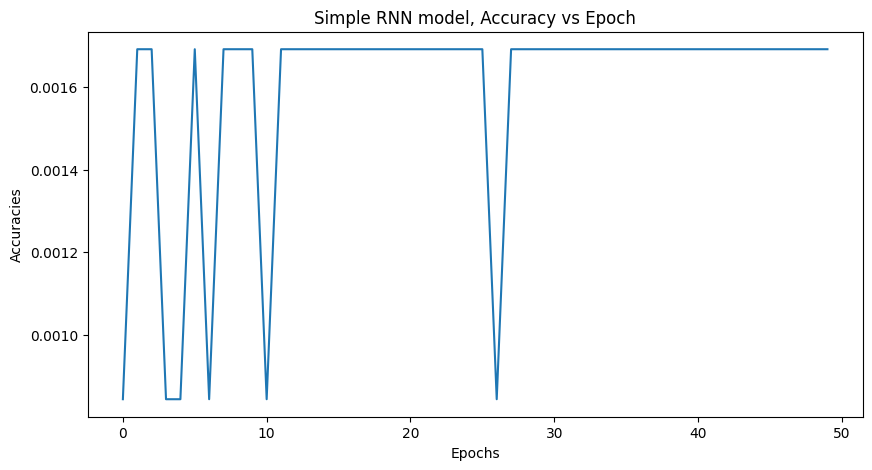

In [ ]:
# Plotting Accuracy vs Epochs
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

In [ ]:
y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

37/37 [==============================] - 1s 10ms/step


(1183, 1)

In [ ]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(1183, 1)

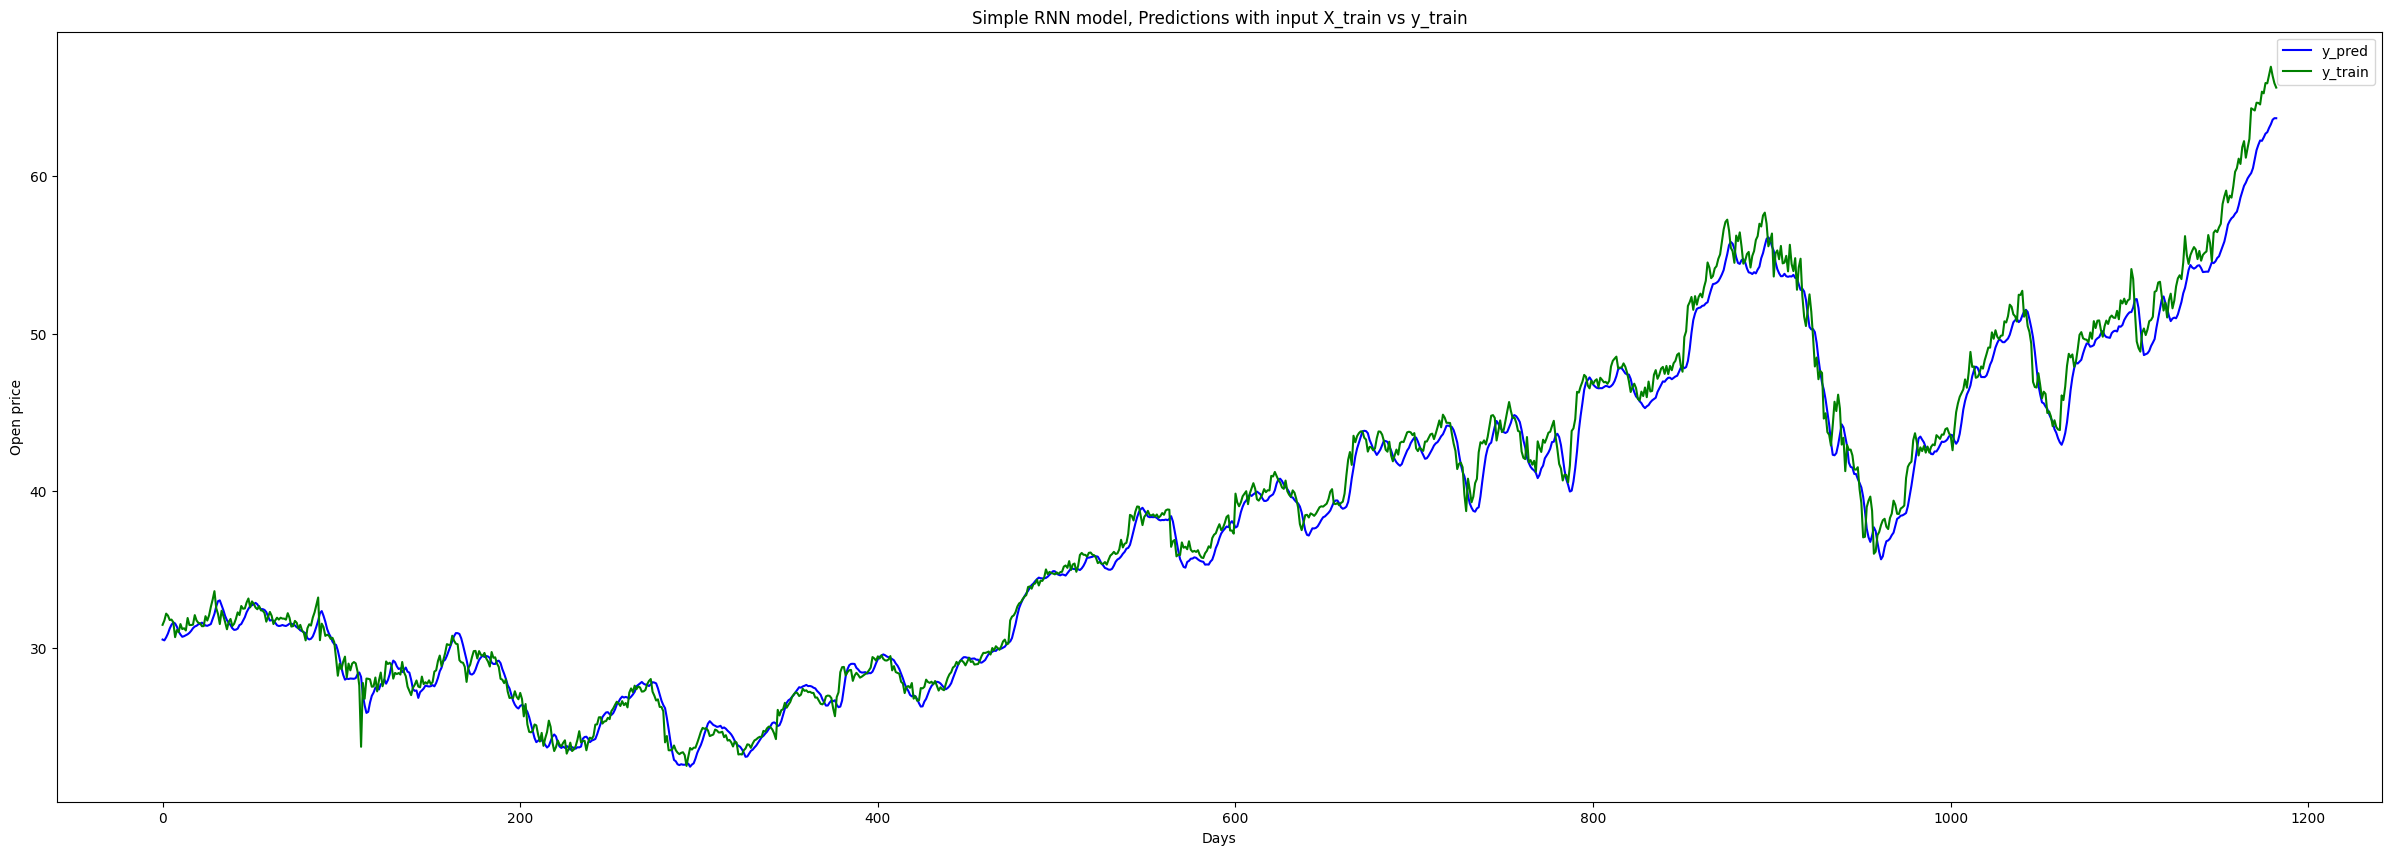

In [ ]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

In [ ]:
dataset_validation = validation_data.Open.values  # getting "open" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (528, 1)


In [ ]:
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

In [ ]:
# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (478, 50)
Shape of y_test before reshape : (478,)


In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

In [ ]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (478, 50, 1)
Shape of y_test after reshape : (478, 1)


In [ ]:
# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test)
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

15/15 [==============================] - 0s 11ms/step
Shape of y_pred_of_test : (478, 1)


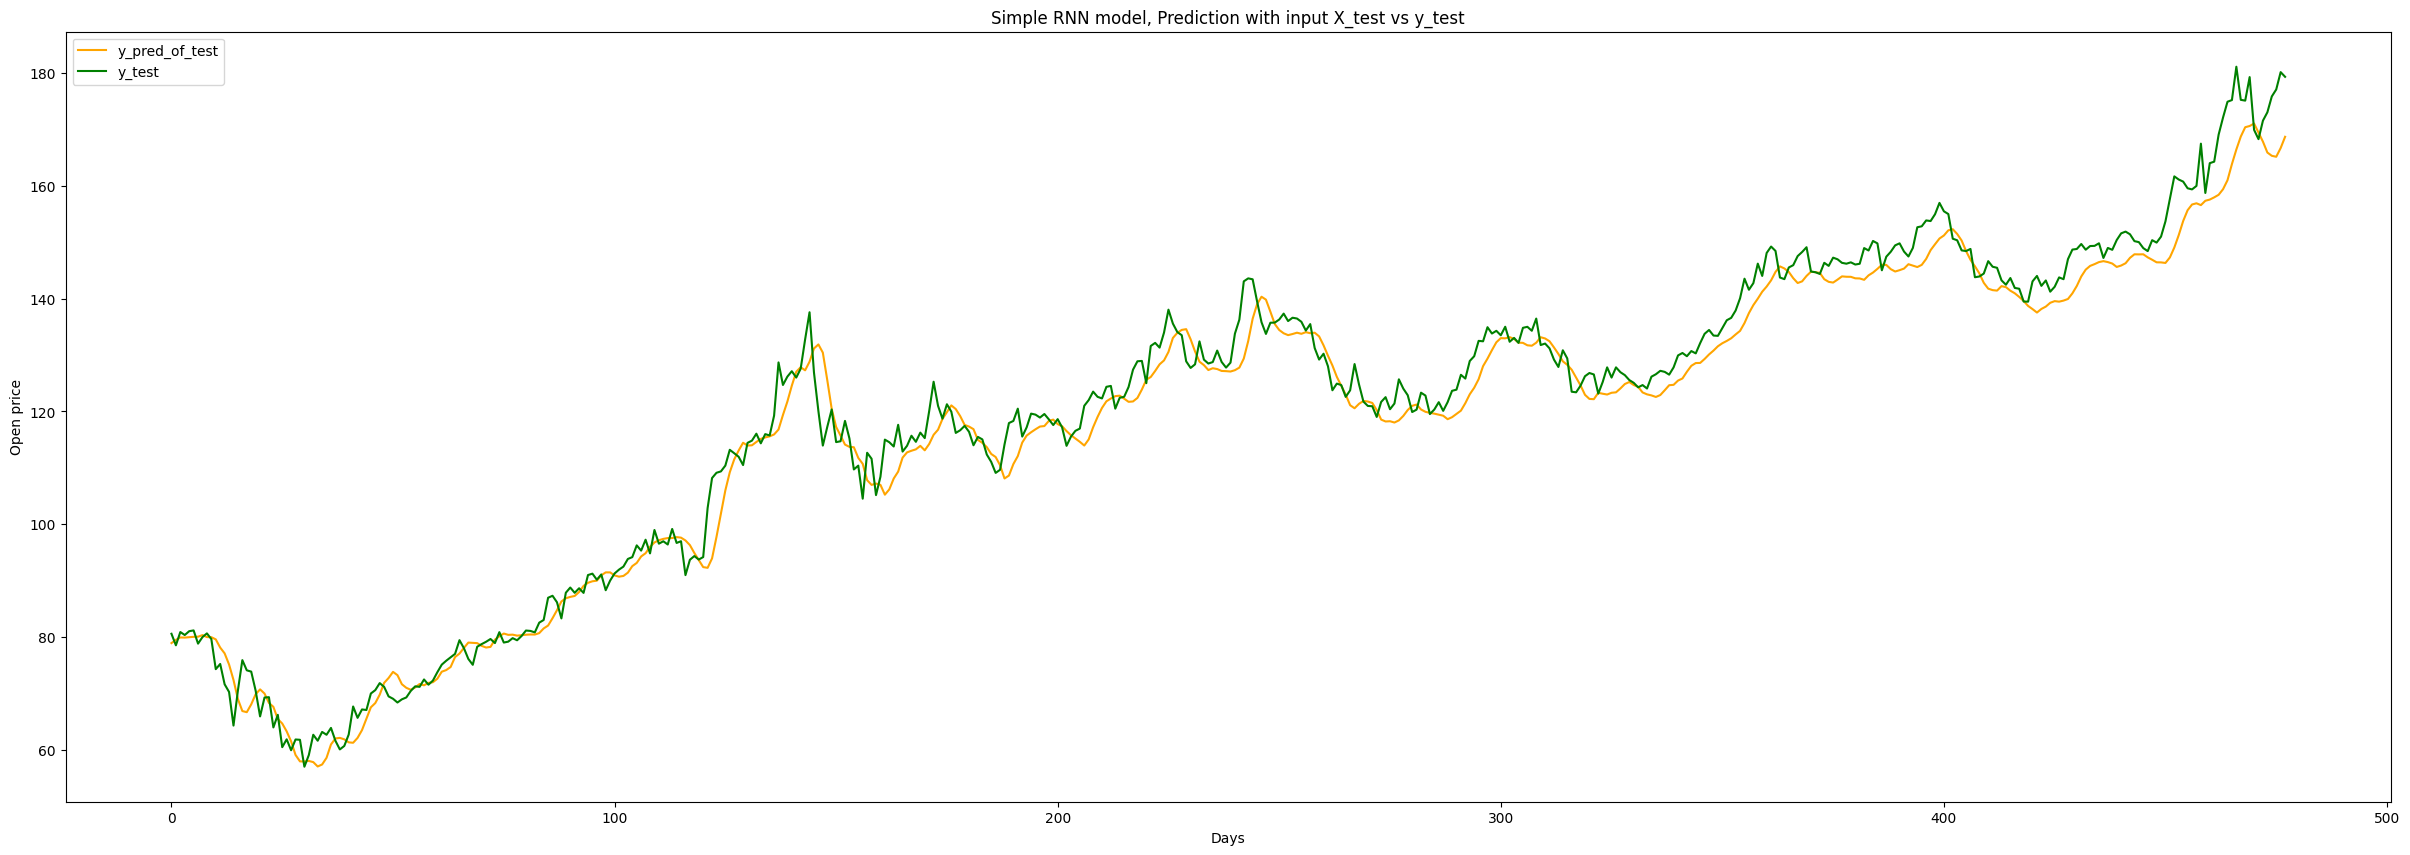

In [ ]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

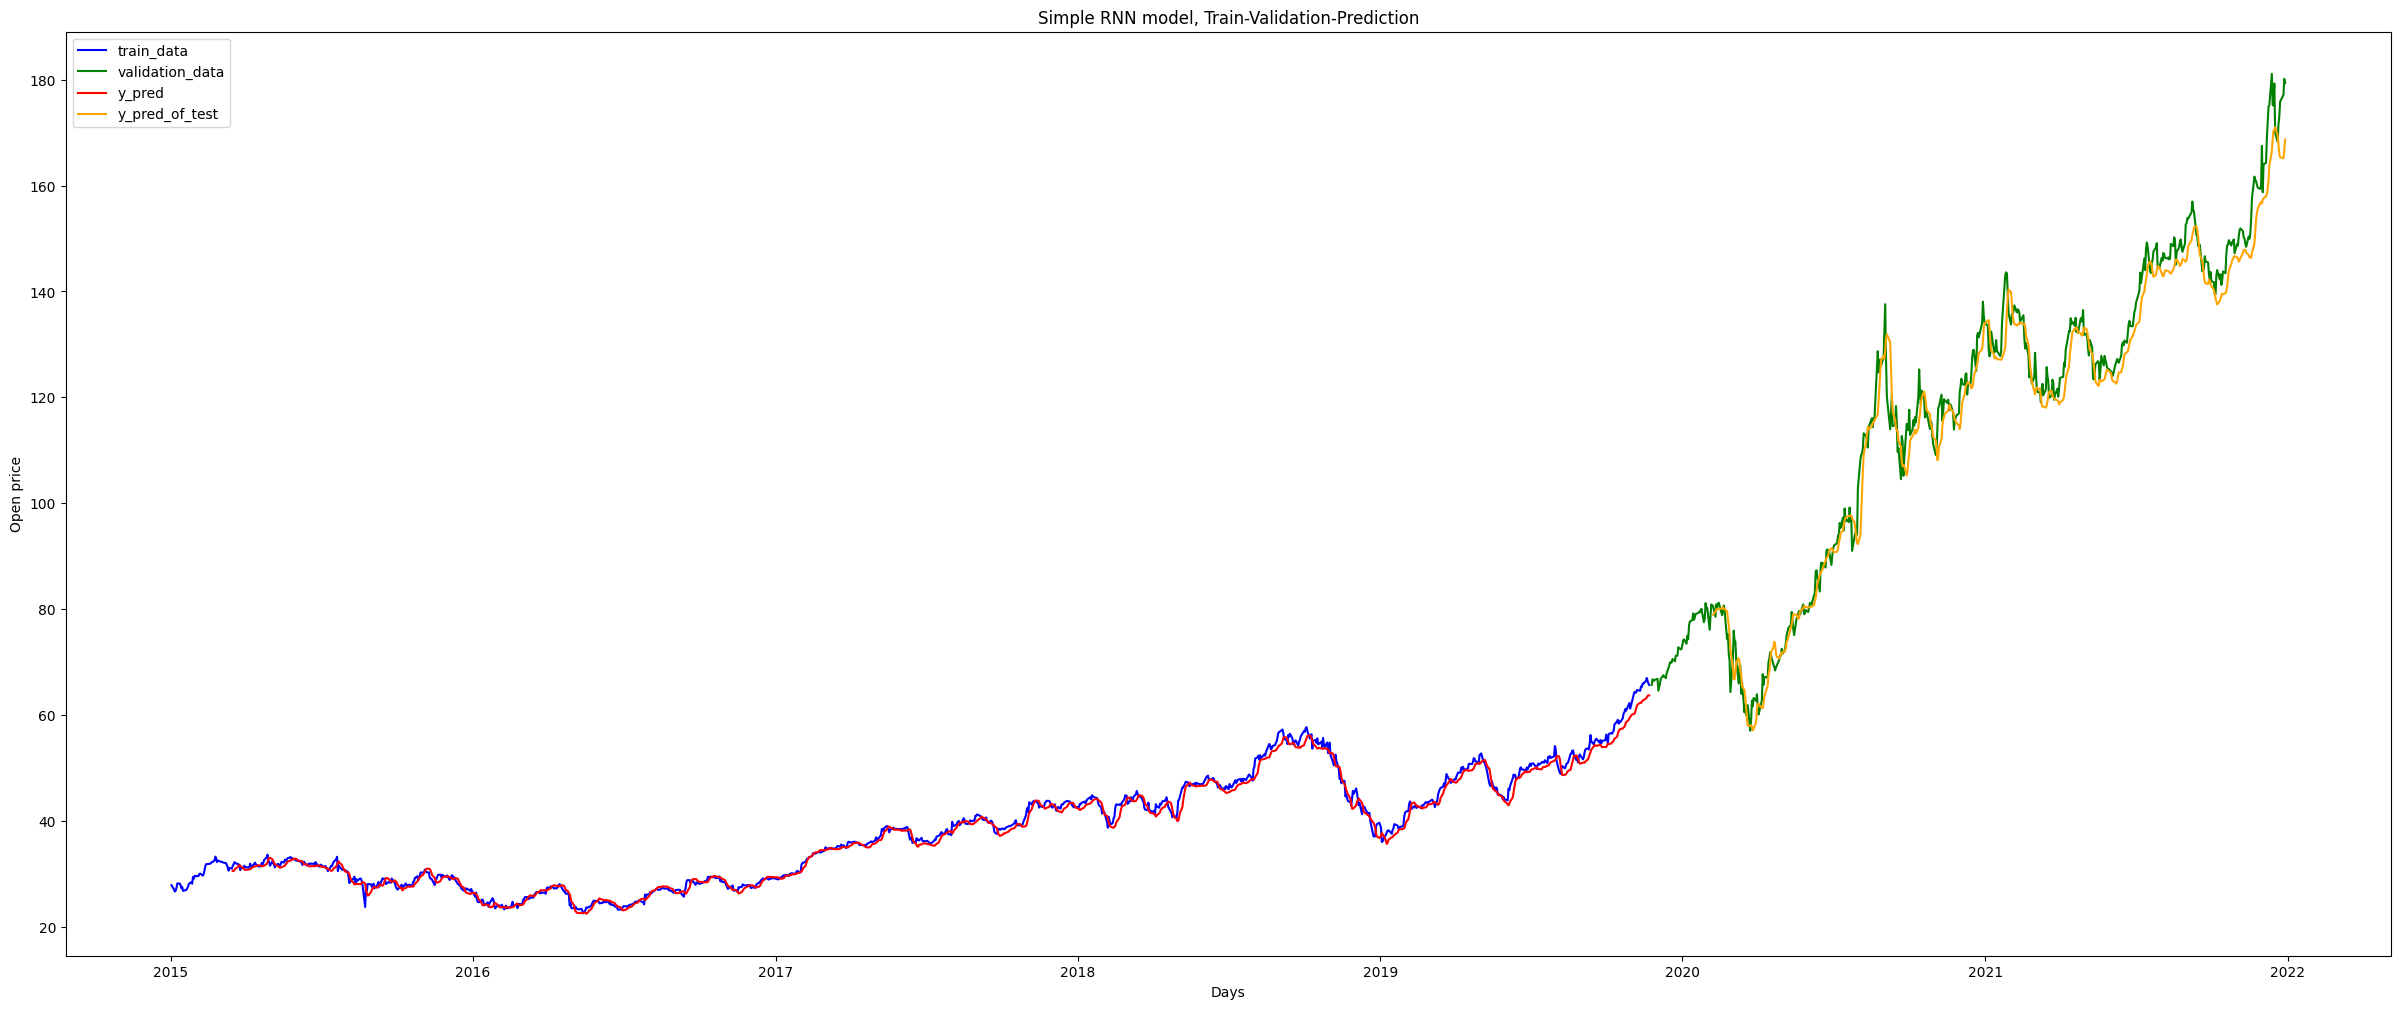

In [ ]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.Open, label = "train_data", color = "b")
plt.plot(validation_data.Date, validation_data.Open, label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()

In [ ]:
y_train = scaler.fit_transform(y_train)

In [ ]:
from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(
    LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) #64 lstm neuron block
model_lstm.add(
    LSTM(64, return_sequences= False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))
model_lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = model_lstm.fit(X_train, y_train, epochs = 10, batch_size = 10)

119/119 [==============================] - 8s 38ms/step - loss: 0.0078 - accuracy: 0.0017
Epoch 2/10
119/119 [==============================] - 4s 36ms/step - loss: 0.0011 - accuracy: 0.0017
Epoch 3/10
119/119 [==============================] - 4s 35ms/step - loss: 8.8312e-04 - accuracy: 0.0017
Epoch 4/10
119/119 [==============================] - 4s 37ms/step - loss: 8.4637e-04 - accuracy: 0.0017
Epoch 5/10
119/119 [==============================] - 4s 37ms/step - loss: 6.5944e-04 - accuracy: 0.0017
Epoch 6/10
119/119 [==============================] - 4s 36ms/step - loss: 6.4945e-04 - accuracy: 0.0017
Epoch 7/10
119/119 [==============================] - 4s 32ms/step - loss: 6.5813e-04 - accuracy: 0.0017
Epoch 8/10
119/119 [==============================] - 4s 34ms/step - loss: 5.5488e-04 - accuracy: 0.0017
Epoch 9/10
119/119 [==============================] - 5s 38ms/step - loss: 6.5059e-04 - accuracy: 0.0017
Epoch 10/10
119/119 [==============================] - 4s 31ms/step - loss

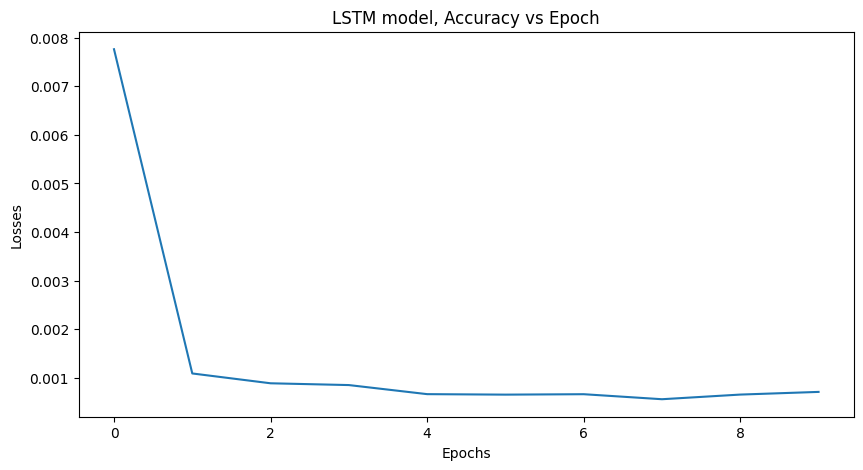

In [ ]:
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

15/15 [==============================] - 1s 12ms/step


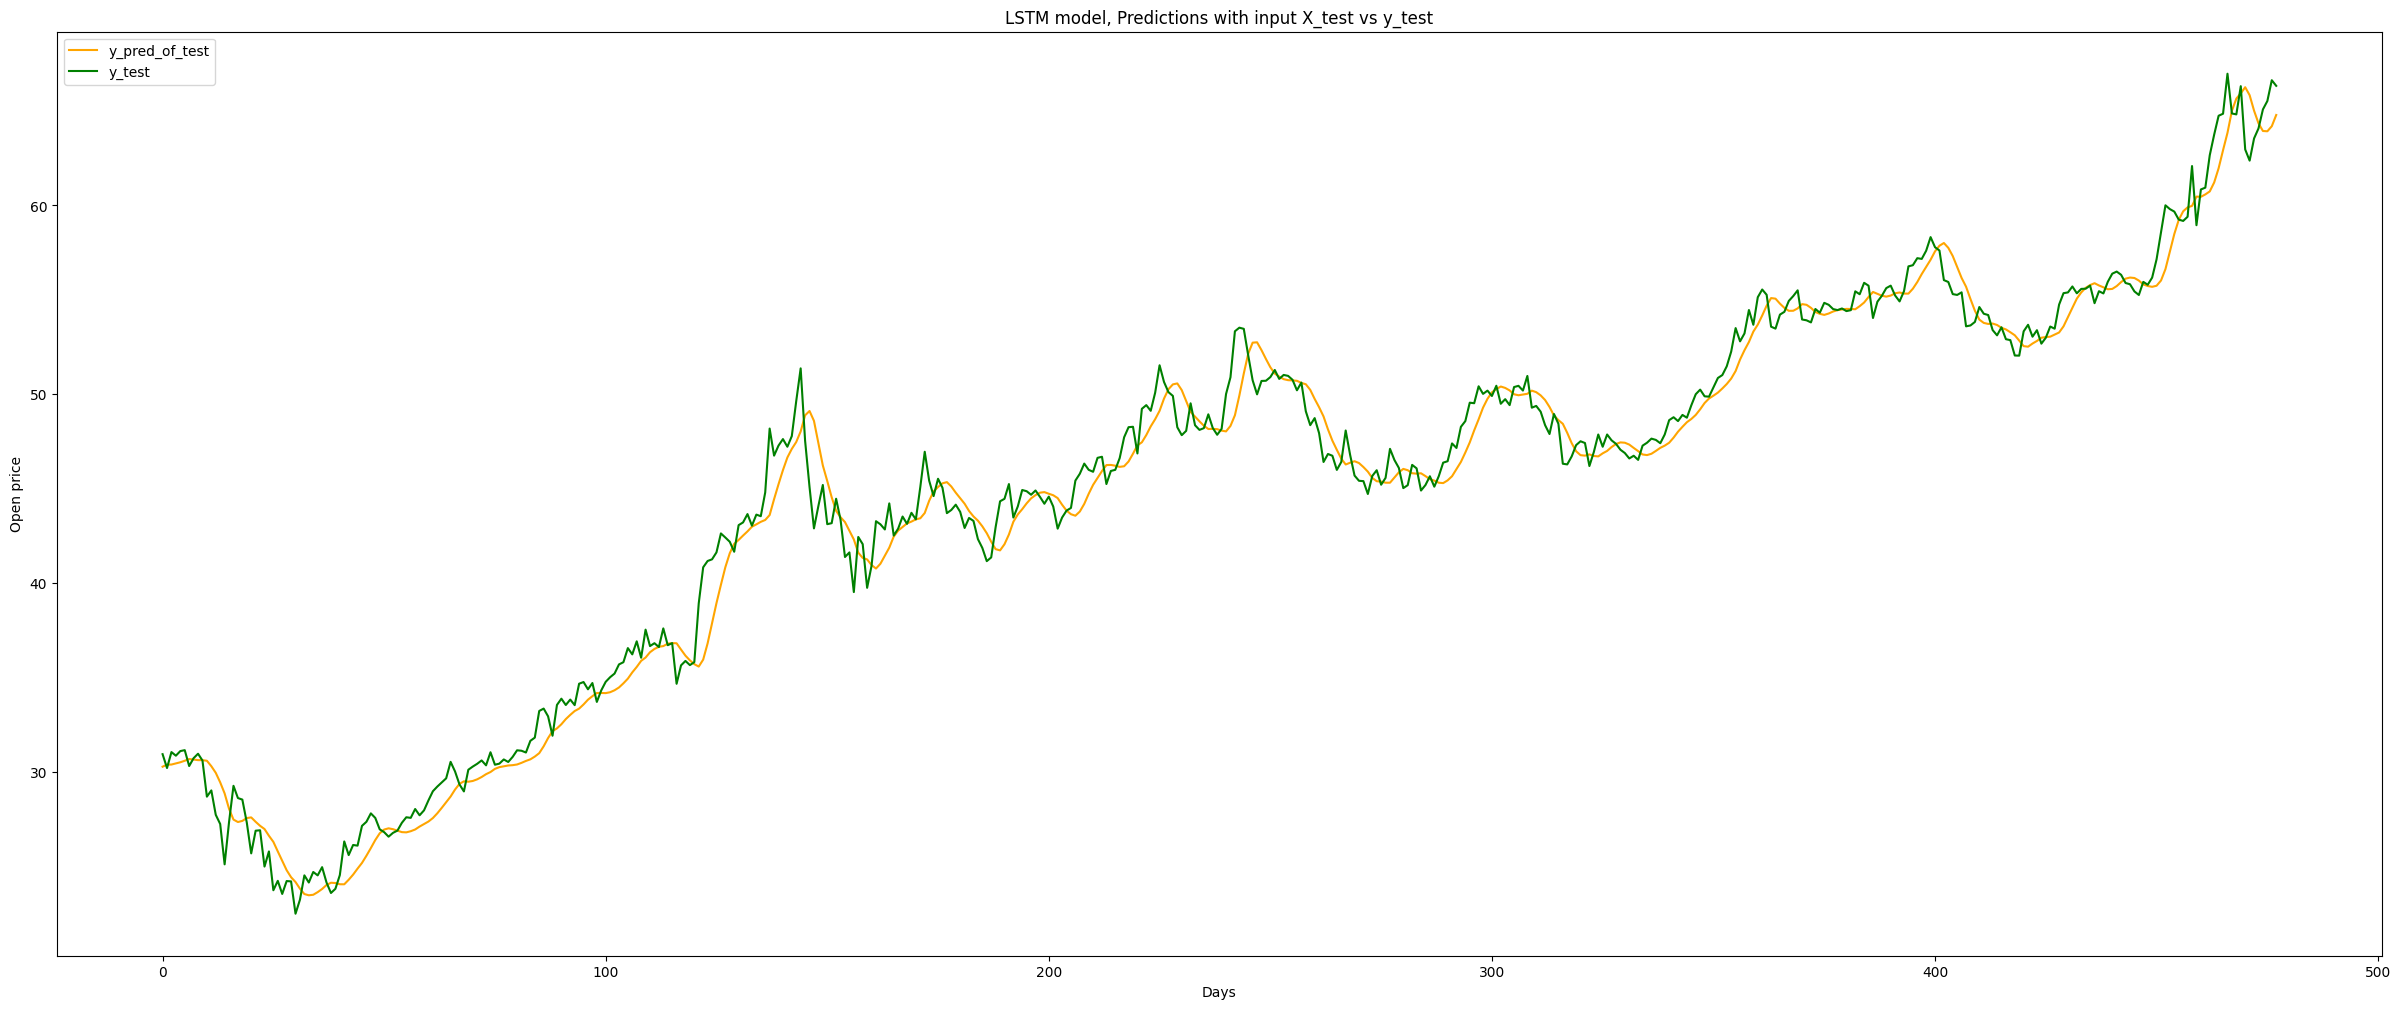

In [ ]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(model_lstm.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

In [ ]:
data.iloc[-1]

Date         2021-12-29
Open         179.330002
High         180.630005
Low          178.139999
Close        179.380005
Adj Close    179.380005
Volume         62231200
Name: 1760, dtype: object

In [ ]:
X_input = data.iloc[-time_step:].Open.values               # getting last 50 rows and converting to array
X_input = scaler.fit_transform(X_input.reshape(-1,1))      # converting to 2D array and scaling
X_input = np.reshape(X_input, (1,50,1))                    # reshaping : converting to 3D array
print("Shape of X_input :", X_input.shape)
X_input

Shape of X_input : (1, 50, 1)


array([[[0.        ],
        [0.04954565],
        [0.05277054],
        [0.07856954],
        [0.04895919],
        [0.06801545],
        [0.06889493],
        [0.08238089],
        [0.00615673],
        [0.05804779],
        [0.04837318],
        [0.09909129],
        [0.13397851],
        [0.14306667],
        [0.12899469],
        [0.09352102],
        [0.08824418],
        [0.05716834],
        [0.04162996],
        [0.09850484],
        [0.08589877],
        [0.11697464],
        [0.19642369],
        [0.31193196],
        [0.4300791 ],
        [0.41366168],
        [0.40281457],
        [0.36822082],
        [0.36235708],
        [0.38053386],
        [0.6001173 ],
        [0.34388772],
        [0.498681  ],
        [0.50659625],
        [0.64702454],
        [0.73644122],
        [0.81794222],
        [0.82673738],
        [1.        ],
        [0.82790985],
        [0.82380551],
        [0.94605699],
        [0.67194365],
        [0.62357092],
        [0.71973037],
        [0

In [ ]:
simple_RNN_prediction = scaler.inverse_transform(regressor.predict(X_input))
LSTM_prediction = scaler.inverse_transform(model_lstm.predict(X_input))
print("Simple RNN, Open price prediction for 3/18/2017      :", simple_RNN_prediction[0,0])
print("LSTM prediction, Open price prediction for 3/18/2017 :", LSTM_prediction[0,0])

1/1 [==============================] - 0s 22ms/step
Simple RNN, Open price prediction for 3/18/2017      : 175.15617
LSTM prediction, Open price prediction for 3/18/2017 : 176.46896
